In [28]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42

In [29]:
# dataset = Path('gestures_dataset_new.csv')
DATASET_CSV = Path('../gestures_dataset.csv')
DATASET_ROOT = Path('../ai_data/vgt-all')

UPLOADED_DATASET_CSV = Path('../uploaded_gestures_dataset.csv')
UPLOADED_DATASET_ROOT = Path('../ai_data/vgt-uploaded')

# Preprocessing

In [30]:
def handedness_data_from_directory_names(dataset_location: Path):
    handedness_data = {}
    for gesture_folder in os.listdir(dataset_location):
        gesture_name, handedness_string = gesture_folder.split('_')
        handedness_data[gesture_name] = (handedness_string[0] == '1', handedness_string[1] == '1')
    return handedness_data

In [31]:
%load_ext autoreload
%autoreload 2
from sl_ai.gesture_classifier import GestureClassifier
from sl_ai.dataset import GestureDataset

gesture_dataset: GestureDataset = GestureDataset()
# gesture_dataset.scan_videos(dataset_location=DATASET_ROOT, handedness_data=handedness_data_from_directory_names(DATASET_ROOT))
# gesture_dataset.analyze_videos(csv_out_path=DATASET_CSV, overwrite=True)

gesture_dataset.load_from_csv(DATASET_CSV)
# uploaded_dataset: GestureDataset = GestureDataset()
# uploaded_dataset.load_from_csv(UPLOADED_DATASET_CSV)
# gesture_dataset.append_dataset(uploaded_dataset)

gesture_dataset.summary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
belgië(0 -> 0)
bowlen(1 -> 1)
computer(2 -> 2)
duidelijk(3 -> 3)
fietsen(4 -> 4)
gebaar(5 -> 5)
geit(6 -> 6)
hallo(7 -> 7)
kameel(8 -> 8)
muis(9 -> 9)
tennis(10 -> 10)
verenigde staten(11 -> 11)
Something went wrong while processing usa - 2023-01-04_16-18-24.mp4: list index out of range
Dataset contain 12 gestures.


In [32]:
gesture_dataset.x_data.shape

(175, 400)

In [33]:
gesture_dataset.y_data.shape

(175,)

In [34]:
len(gesture_dataset)

12

In [91]:
%load_ext autoreload
%autoreload 2
from sl_ai.gesture_classifier import GestureClassifier

classifier: GestureClassifier = GestureClassifier(gesture_dataset=gesture_dataset)
classifier.train(train_size=.5)
classifier.summary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training model:
Dataset contain 12 gestures.
Epoch 1/1000
87/87 [==============================] - 1s 3ms/step - loss: 2.2848 - sparse_categorical_accuracy: 0.1264 - val_loss: 1.8190 - val_sparse_categorical_accuracy: 0.2955
Epoch 2/1000
87/87 [==============================] - 0s 1ms/step - loss: 1.7831 - sparse_categorical_accuracy: 0.3218 - val_loss: 1.5794 - val_sparse_categorical_accuracy: 0.4091
Epoch 3/1000
87/87 [==============================] - 0s 1ms/step - loss: 1.5365 - sparse_categorical_accuracy: 0.4138 - val_loss: 1.5089 - val_sparse_categorical_accuracy: 0.5000
Epoch 4/1000
87/87 [==============================] - 0s 2ms/step - loss: 1.4396 - sparse_categorical_accuracy: 0.4253 - val_loss: 1.4143 - val_sparse_categorical_accuracy: 0.4091
Epoch 5/1000
87/87 [==============================] - 0s 1ms/step - loss: 1.2383 - sparse_categorical_accuracy: 0.5402 - val_loss: 1.2205 - val_spa

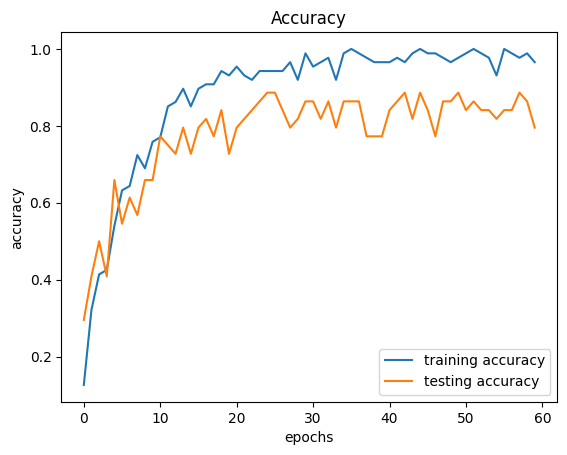

In [92]:
classifier.visualize_accuracy()

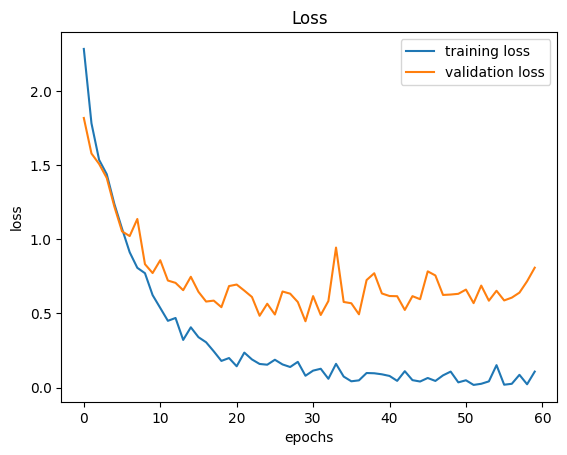

In [93]:
classifier.visualize_loss()

2/2 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      1.00      1.00         3
           2       0.38      0.75      0.50         4
           3       1.00      0.50      0.67         4
           4       0.00      0.00      0.00         3
           5       0.33      0.50      0.40         2
           6       0.50      1.00      0.67         4
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         3
           9       0.50      0.33      0.40         3
          10       1.00      1.00      1.00         5
          11       1.00      0.67      0.80         3

    accuracy                           0.68        44
   macro avg       0.73      0.66      0.66        44
weighted avg       0.77      0.68      0.68        44



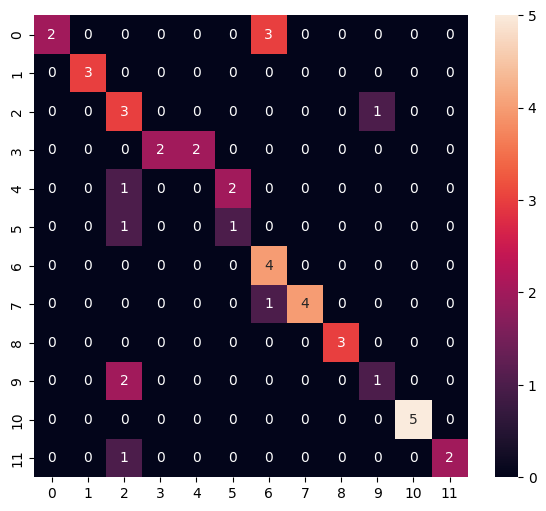

In [94]:
classifier.confusion_matrix()

In [95]:
classifier.save_model("../model_notebook.h5")

# Make a predictions

In [40]:
from sl_ai.dataset import detect_hands_task, GestureData

video_path = Path('../ai_data/vgt-all/duidelijk_11/duidelijk - 2023-01-04_16-41-21.mp4')
gesture_data = GestureData(name="hello", left_hand=False, right_hand=True)
video_name, (frame_width, frame_height), left_landmarks, right_landmarks = detect_hands_task(gesture_data, video_path)


In [41]:
from sl_ai.dataset import preprocess_landmarks
from copy import deepcopy
left_landmarks_copy = deepcopy(left_landmarks)
right_landmarks_copy = deepcopy(right_landmarks)
preprocess_landmarks(left_landmarks_copy, right_landmarks_copy, None, None)

In [42]:
from sl_ai.dataset import pre_process_point_history_center

for i, landmarks in left_landmarks_copy.items():
    left_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)
for i, landmarks in right_landmarks_copy.items():
    right_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)

In [43]:
result = classifier.predict(left_landmarks_copy, right_landmarks_copy)
classes_x = np.argmax(result, axis=1)
print(classes_x)
prediction_percents = (result*100)
frame = pd.DataFrame(prediction_percents.astype(np.int32))
print(frame)

1/1 [==============================] - 0s 15ms/step
[10]
   0   1   2   3   4   5   6   7   8   9   10  11
0  15   9   0   0   1   0  23  11   0   0  37   0


In [44]:
result

array([[1.51865110e-01, 9.15786102e-02, 2.42168177e-03, 5.48535632e-03,
        1.11374045e-02, 4.36316151e-03, 2.37198979e-01, 1.17260449e-01,
        1.79989252e-03, 3.07942937e-05, 3.76815587e-01, 4.30189975e-05]],
      dtype=float32)

In [45]:
l = np.array(left_landmarks_copy[12], dtype='float32')
r = np.array(right_landmarks_copy[12], dtype='float32')

x_data = np.concatenate((l, r), axis=0)
x_data = x_data.reshape((-1, x_data.shape[0]))
results = classifier.model.predict(x_data, batch_size=1)
classes_x = np.argmax(result, axis=1)
print(classes_x)
prediction_percents = (result*100)
frame = pd.DataFrame(prediction_percents.astype(np.int32))
print(frame)

1/1 [==============================] - 0s 14ms/step
[10]
   0   1   2   3   4   5   6   7   8   9   10  11
0  15   9   0   0   1   0  23  11   0   0  37   0
